<a href="https://colab.research.google.com/github/Sohammhatre10/MOSCharacteristics/blob/main/MOSFETCharacteristics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gdown
import gdown

input_file = "https://drive.google.com/uc?id=1r0oTr73TmgzlxfRxQmOhnTWxkwFVwC4X"
output_file = "moschar.zip"
gdown.download(input_file, output_file)

Downloading...
From: https://drive.google.com/uc?id=1r0oTr73TmgzlxfRxQmOhnTWxkwFVwC4X
To: /content/moschar.zip
100%|██████████| 89.2k/89.2k [00:00<00:00, 40.7MB/s]


'moschar.zip'

In [3]:
!unzip moschar.zip

Archive:  moschar.zip
  inflating: training_data.csv       
  inflating: val01.csv               
  inflating: val02.csv               
  inflating: val03.csv               
  inflating: val04.csv               
  inflating: val05.csv               
  inflating: val06.csv               


In [4]:
import pandas as pd

train_data = pd.read_csv("training_data.csv")

train_data

,Vds,Vgs,Id
0,0.00,0.0,0.000000e+00
1,0.02,0.0,2.770000e-14
2,0.04,0.0,4.790000e-14
3,0.06,0.0,6.900000e-14
4,0.08,0.0,8.950000e-14
...,...,...,...
25346,4.92,5.0,1.430000e-04
25347,4.94,5.0,1.430000e-04
25348,4.96,5.0,1.430000e-04
25349,4.98,5.0,1.430000e-04


In [5]:
val01 = pd.read_csv('val01.csv')
val01
df = train_data

In [6]:
df["Id"].replace({0:1e-13}, inplace=True)
df["Vgs"].replace({0:1e-3}, inplace=True)
df["Vds"].replace({0:1e-3}, inplace=True)

In [7]:
df['Id']

0        1.000000e-13
1        2.770000e-14
2        4.790000e-14
3        6.900000e-14
4        8.950000e-14
             ...     
25346    1.430000e-04
25347    1.430000e-04
25348    1.430000e-04
25349    1.430000e-04
25350    1.440000e-04
Name: Id, Length: 25351, dtype: float64

In [8]:
id=df["Id"]
Vgs=df["Vgs"]
Vds=df["Vds"]

In [9]:
import numpy as np
yy=np.ravel(id)
X1=df.iloc[:,0:2]
X=np.log10(X1)
X

,Vds,Vgs
0,-3.000000,-3.00000
1,-1.698970,-3.00000
2,-1.397940,-3.00000
3,-1.221849,-3.00000
4,-1.096910,-3.00000
...,...,...
25346,0.691965,0.69897
25347,0.693727,0.69897
25348,0.695482,0.69897
25349,0.697229,0.69897


In [10]:
from sklearn.model_selection import train_test_split
y = np.log10(yy)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [11]:
import tensorflow as tf
from tensorflow.keras.callbacks import LearningRateScheduler

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mse']
)

def learning_rate_scheduler(epochs):
    return 0.01

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(learning_rate_scheduler)

history = model.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler], validation_data=(X_test, y_test))


Epoch 1/100
634/634 [==============================] - 3s 3ms/step - loss: 0.6911 - mse: 3.3953 - val_loss: 0.0797 - val_mse: 0.0725 - lr: 0.0100
Epoch 2/100
634/634 [==============================] - 3s 5ms/step - loss: 0.1017 - mse: 0.1061 - val_loss: 0.0914 - val_mse: 0.0628 - lr: 0.0100
Epoch 3/100
634/634 [==============================] - 3s 5ms/step - loss: 0.0779 - mse: 0.0738 - val_loss: 0.0377 - val_mse: 0.0329 - lr: 0.0100
Epoch 4/100
634/634 [==============================] - 3s 5ms/step - loss: 0.0621 - mse: 0.0429 - val_loss: 0.0743 - val_mse: 0.0195 - lr: 0.0100
Epoch 5/100
634/634 [==============================] - 3s 5ms/step - loss: 0.0536 - mse: 0.0235 - val_loss: 0.0630 - val_mse: 0.0131 - lr: 0.0100
Epoch 6/100
634/634 [==============================] - 5s 8ms/step - loss: 0.0489 - mse: 0.0190 - val_loss: 0.0465 - val_mse: 0.0102 - lr: 0.0100
Epoch 7/100
634/634 [==============================] - 3s 5ms/step - loss: 0.0444 - mse: 0.0141 - val_loss: 0.0310 - val_mse

1/1 [==============================] - 0s 21ms/step


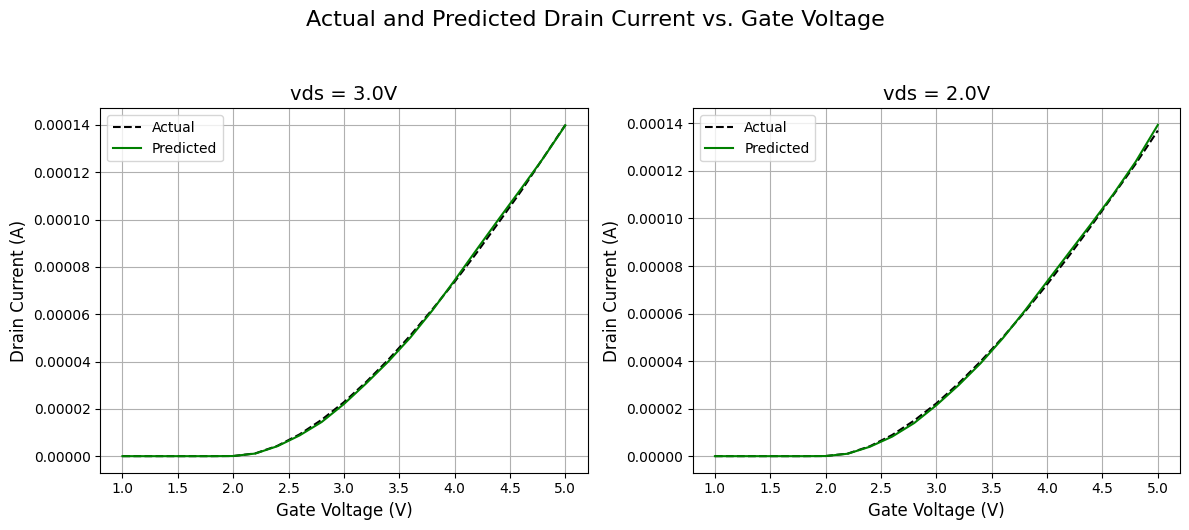

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data files
data1 = pd.read_csv('val02.csv')
data2 = pd.read_csv('val01.csv')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Function to plot data
def plot_data(data, ax):
    val_feature = data.iloc[:, 0:2]
    X = val_feature
    y_true = np.ravel(data["id"])

    # Normalize input data and target variable
    X_norm = np.log10(X)
    y_norm = np.log10(y_true)
    y_norm = y_norm.reshape(-1, 1)

    # Predict the target variable
    y_pred = model.predict(X_norm)

    # Plot the result
    vg1 = data["vgs"]
    vg = np.ravel(vg1)
    vg = vg.reshape(-1, 1)

    # Plot the actual values
    ax.plot(vg, 10**y_norm, 'black', label='Actual', linestyle="dashed")

    # Plot the predicted values
    ax.plot(vg, 10**y_pred, 'green', label='Predicted')

    ax.set_title(f'{data.columns[0]} = {data["vds"][0]}V', fontsize=14)
    ax.set_xlabel('Gate Voltage (V)', fontsize=12)
    ax.set_ylabel('Drain Current (A)', fontsize=12)
    ax.legend()
    ax.grid(True)

# Plot data for each file
plot_data(data1, ax1)
plot_data(data2, ax2)

# Set the overall title
fig.suptitle('Actual and Predicted Drain Current vs. Gate Voltage', fontsize=16, y=1.05)

plt.tight_layout()
plt.savefig('plot_vgs.png')
plt.show()

1/1 [==============================] - 0s 29ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
<ipython-input-13-f1242fe595ae>:21: RuntimeWarning: divide by zero encountered in log10
  y_norm = np.log10(y_true)


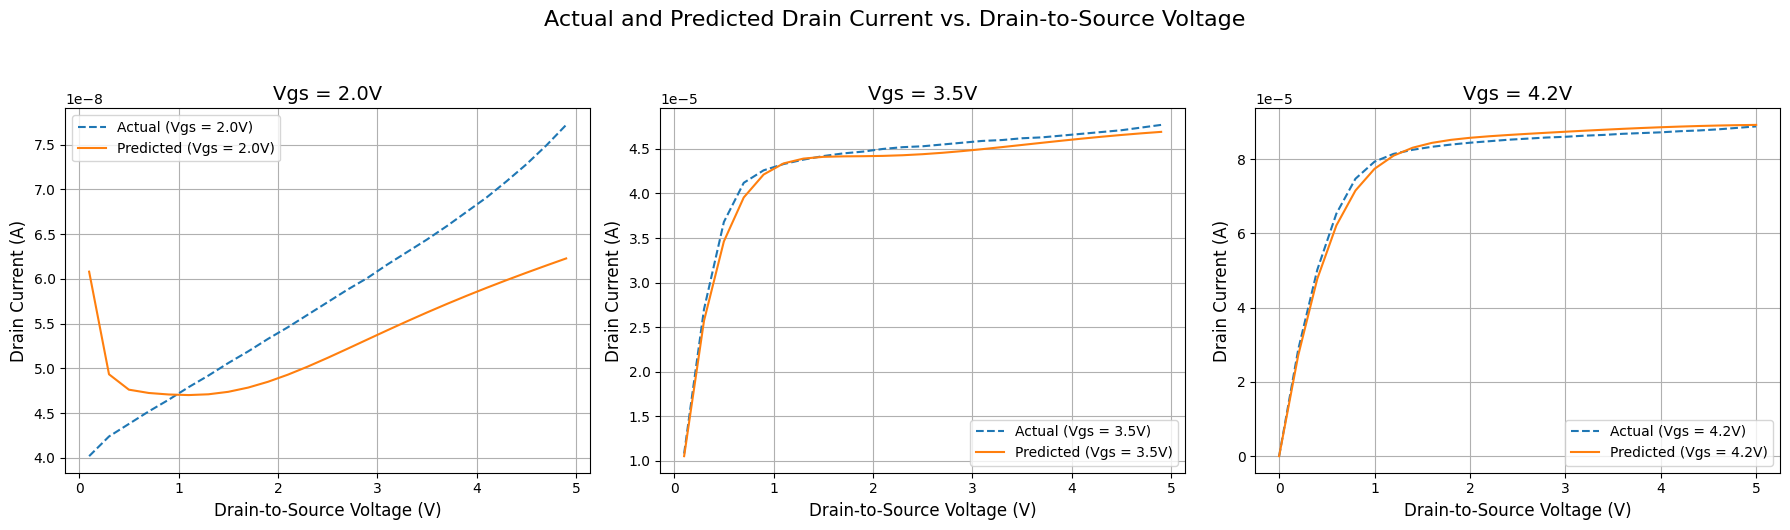

<Figure size 640x480 with 0 Axes>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data files
data1 = pd.read_csv('val03.csv')
data2 = pd.read_csv('val04.csv')
data3 = pd.read_csv('val06.csv')

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Function to plot data
def plot_data(data, ax, vgs_val):
    input_data = data.iloc[:, 0:2]
    X = input_data
    y_true = np.ravel(data["id"])

    # Normalize input data and target variable
    X_norm = np.log10(X)
    y_norm = np.log10(y_true)
    y_norm = y_norm.reshape(-1, 1)

    # Predict the target variable
    y_pred = model.predict(X_norm)

    # Plot the result
    vds_data = data["vds"]
    vds = np.ravel(vds_data)
    vds = vds.reshape(-1, 1)

    # Plot the actual values
    mask = data['vgs'] == vgs_val
    ax.plot(vds[mask], 10**y_norm[mask], label=f'Actual (Vgs = {vgs_val}V)', linestyle='--')

    # Plot the predicted values
    mask = data['vgs'] == vgs_val
    ax.plot(vds[mask], 10**y_pred[mask], label=f'Predicted (Vgs = {vgs_val}V)')

    ax.set_title(f'Vgs = {vgs_val}V', fontsize=14)
    ax.set_xlabel('Drain-to-Source Voltage (V)', fontsize=12)
    ax.set_ylabel('Drain Current (A)', fontsize=12)
    ax.legend()
    ax.grid(True)

# Plot data for each file with specific vgs values
plot_data(data1, ax1, 2.0)  # vgs = 2.0V for val03.csv
plot_data(data2, ax2, 3.5)  # vgs = 3.5V for val04.csv
plot_data(data3, ax3, 4.2)  # vgs = 4.2V for val06.csv

# Set the overall title
fig.suptitle('Actual and Predicted Drain Current vs. Drain-to-Source Voltage', fontsize=16, y=1.05)

plt.tight_layout()
plt.show()

plt.savefig('plot_vds.png')

# Download the plot as an image file
# files.download('plot_vds.png')

In [14]:
# Assume the length of Drain to source common being 5nm and assuming no extension or contraction
# For Parallel
train_data = pd.read_csv('training_data.csv')
val01 = pd.read_csv('val01.csv')
val02 = pd.read_csv('val02.csv')
val03 = pd.read_csv('val03.csv')
val04 = pd.read_csv('val04.csv')
val06 = pd.read_csv('val06.csv')

train_data["Vfg"] = "0V"
train_data["Vfd"] = "0V"

val01["Vfg"] = "0V"
val01["Vfd"] = "0V"

val02["Vfg"] = "0V"
val02["Vfd"] = "0V"

val03["Vfg"] = "0V"
val03["Vfd"] = "0V"

val04["Vfg"] = "0V"
val04["Vfd"] = "0V"

val06["Vfg"] = "0V"
val06["Vfd"] = "0V"

###`Assumptions here are - `
1) High Gravitational Forces to be assumed to the power of 10^9N.

2) Event horizon for high Gravitational body to be 3*10^30m according to  Schwarzschild Radius.

3) Gradual Channel Approximation (GCA) Approach used for maintaining the channel shape and its resistance.



In [42]:
train_data["Vfg"] = np.sqrt(train_data["Vgs"]**2 + 6.4009)
train_data["Vfd"] = train_data["Vds"] + 2.53

val01["Vfg"] = np.sqrt(val01["vgs"]**2 + 6.4009)
val01["Vfd"] = val01["vds"] + 2.53

val02["Vfg"] = np.sqrt(val02["vgs"]**2 + 6.4009)
val02["Vfd"] = val02["vds"] + 2.53

val03["Vfg"] = np.sqrt(val03["vgs"]**2 + 6.4009)
val03["Vfd"] = val03["vds"] + 2.53

val04["Vfg"] = np.sqrt(val04["vgs"]**2 + 6.4009)
val04["Vfd"] = val04["vds"] + 2.53

val06["Vfg"] = np.sqrt(val06["vgs"]**2 + 6.4009)
val06["Vfd"] = val06["vds"] + 2.53

# train_data["Ids_g"] = 10**-4 * ((train_data["Vfg"] - 5) * train_data["Vfd"] - (train_data["Vfd"]**2 / 2))
# val01["Ids_g"] = 10**-4 * ((val01["Vfg"] - 5) * val01["Vfd"] - (val01["Vfd"]**2 / 2))
# val02["Ids_g"] = 10**-4 * ((val02["Vfg"] - 5) * val02["Vfd"] - (val02["Vfd"]**2 / 2))
# val03["Ids_g"] = 10**-4 * ((val03["Vfg"] - 5) * val03["Vfd"] - (val03["Vfd"]**2 / 2))
# val04["Ids_g"] = 10**-4 * ((val04["Vfg"] - 5) * val04["Vfd"] - (val04["Vfd"]**2 / 2))
# val06["Ids_g"] = 10**-4 * ((val06["Vfg"] - 5) * val06["Vfd"] - (val06["Vfd"]**2 / 2))


train_data["Ids_g"] = 10**-4 * abs((train_data["Vfg"] - 5) * train_data["Vfd"] - (train_data["Vfd"]**2 / 2))
val01["Ids_g"] = 10**-4 * abs((val01["Vfg"] - 5) * val01["Vfd"] - (val01["Vfd"]**2 / 2))
val02["Ids_g"] = 10**-4 * abs((val02["Vfg"] - 5) * val02["Vfd"] - (val02["Vfd"]**2 / 2))
val03["Ids_g"] = 10**-4 * abs((val03["Vfg"] - 5) * val03["Vfd"] - (val03["Vfd"]**2 / 2))
val04["Ids_g"] = 10**-4 * abs((val04["Vfg"] - 5) * val04["Vfd"] - (val04["Vfd"]**2 / 2))
val06["Ids_g"] = 10**-4 * abs((val06["Vfg"] - 5) * val06["Vfd"] - (val06["Vfd"]**2 / 2))

1/1 [==============================] - 0s 22ms/step


<ipython-input-62-e6077cbf6016>:11: RuntimeWarning: divide by zero encountered in log10
  y_norm = np.log10(y_true)


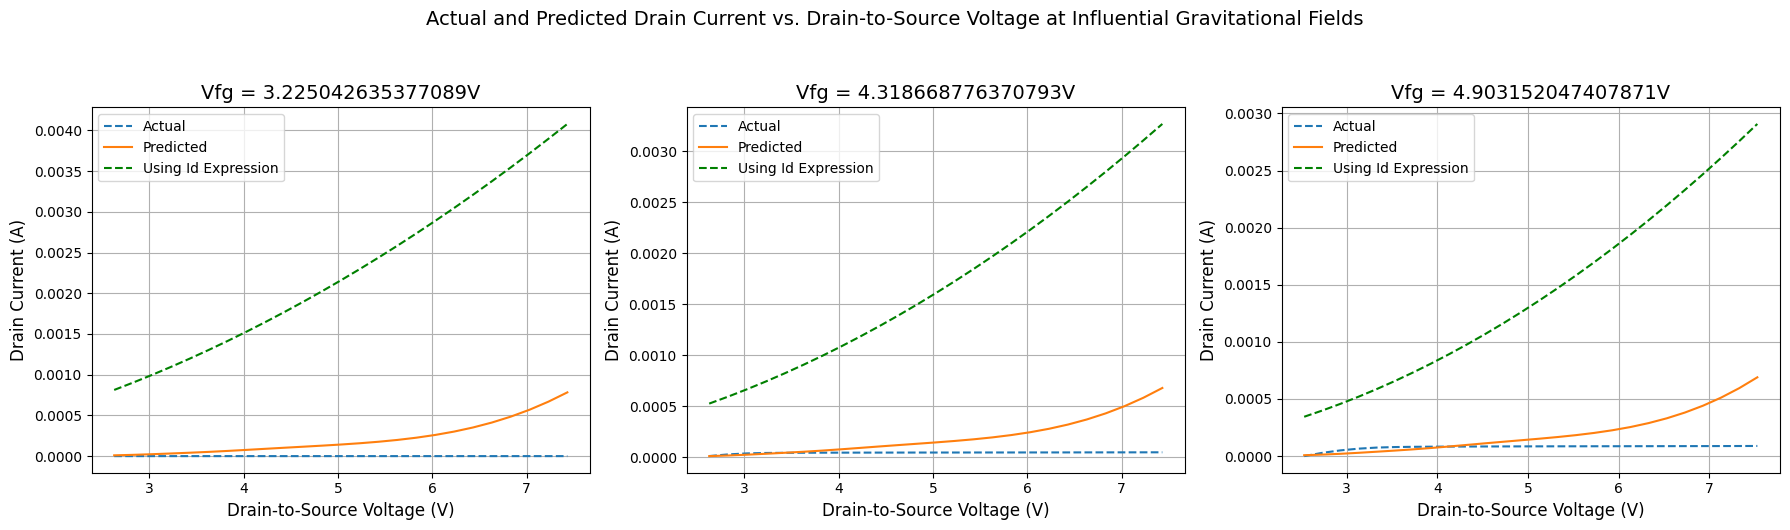

<Figure size 640x480 with 0 Axes>

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Function to plot data
def plot_data(data, ax, vgs_val):
    val_feature = data.iloc[:, [-3, -2]]
    X = val_feature
    y_true = np.ravel(data["id"])

    # Normalize input data and target variable
    X_norm = np.log10(X)
    y_norm = np.log10(y_true)
    y_norm = y_norm.reshape(-1, 1)

    # Predict the target variable
    y_pred = model.predict(X_norm)

    # Plot the result
    vds_data = data["Vfd"]
    vds = np.ravel(vds_data)
    vds = vds.reshape(-1, 1)

    # Plot the actual values
    mask = data['vgs'] == vgs_val
    ax.plot(vds[mask], 10**y_norm[mask], label='Actual', linestyle='--')

    # Plot the predicted values
    mask = data['vgs'] == vgs_val
    ax.plot(vds[mask], 10**y_pred[mask], label='Predicted')

    # Plot the Ids_g values
    mask = data['vgs'] == vgs_val
    ax.plot(vds[mask], data.loc[mask, 'Ids_g'], label='Using Id Expression', linestyle='--', color='green')

    ax.set_title(f'Vfg = {data["Vfg"][0]}V', fontsize=14)
    ax.set_xlabel('Drain-to-Source Voltage (V)', fontsize=12)
    ax.set_ylabel('Drain Current (A)', fontsize=12)
    ax.legend()
    ax.grid(True)

# Plot data for each file with specific vgs values
plot_data(val03, ax1, 2.0)  # vgs = 2.0V for val03.csv
plot_data(val04, ax2, 3.5)  # vgs = 3.5V for val04.csv
plot_data(val06, ax3, 4.2)  # vgs = 4.2V for val06.csv

# Set the overall title
fig.suptitle('Actual and Predicted Drain Current vs. Drain-to-Source Voltage at Influential Gravitational Fields', fontsize=14, y=1.05)

plt.tight_layout()
plt.show()

plt.savefig('plot_vds_high_grav.png')
# files.download('plot_vds_high_grav.png')


1/1 [==============================] - 0s 58ms/step


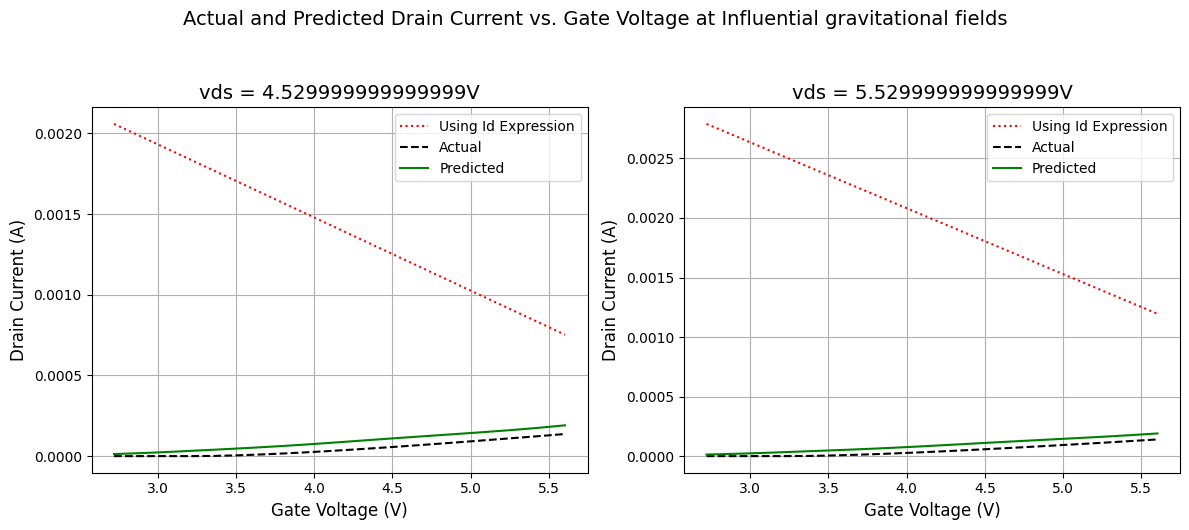

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Function to plot data
def plot_data(data, ax):
    val_feature = data.iloc[:, [-2, -3]]
    X = val_feature
    y_true = np.ravel(data["id"])

    # Normalize input data and target variable
    X_norm = np.log10(X)
    y_norm = np.log10(y_true)
    y_norm = y_norm.reshape(-1, 1)

    # Predict the target variable
    y_pred = model.predict(X_norm)

    # Plot the result
    vg1 = data["Vfg"]
    vg = np.ravel(vg1)
    vg = vg.reshape(-1, 1)
    ax.plot(vg, data["Ids_g"], 'red', label='Using Id Expression', linestyle="dotted")
    ax.plot(vg, 10**y_norm, 'black', label='Actual', linestyle="dashed")
    ax.plot(vg, 10**y_pred, 'green', label='Predicted')

    ax.set_title(f'{data.columns[0]} = {data["Vfd"][0]}V', fontsize=14)
    ax.set_xlabel('Gate Voltage (V)', fontsize=12)
    ax.set_ylabel('Drain Current (A)', fontsize=12)
    ax.legend()
    ax.grid(True)

# Plot data for each file
plot_data(val01, ax1)
plot_data(val02, ax2)

# Set the overall title
fig.suptitle('Actual and Predicted Drain Current vs. Gate Voltage at Influential gravitational fields', fontsize=14, y=1.05)

plt.tight_layout()
plt.savefig('plot_vgs_high_grav.png')
plt.show()
# files.download('plot_vgs_high_grav.png')